# Hyperbolic Exercises

### Exercise 10 (Riemann problem)

Let the vector field $q$ be given with $\text{div}q = 0$.
Consider the transport equation as an initial and boundary value problem (IBVP)
$$ \begin{align*}
    \begin{array}{rcll}
        \partial_t \rho + \text{div}(\rho q)  & = & 0 & \text{on } \Omega \times [0,T] \\
        \rho(0)                       & = & \rho_0 & \text{on } \Omega \\
        \rho                            & = & \rho_\text{in} & \text{on }
        \Gamma_\text{in} = \{ x \in \partial \Omega \colon q \cdot n < 0 \} \times [0, T]
    \end{array}.
\end{align*}$$
This IBVP is solved with finite volume ($\texttt{degree=0}$) and discontinuous Galerkin
($\texttt{degree=1,2}$) methods in space and by Runge-Kutta methods ($\texttt{rkorder=4,-2}$) in time.
In particular, we consider 

$\underline{\text{Problem A:}}$ 
$$
    \begin{align*}
        \begin{array}{lll}
            q &= (0, -1)^T, &(x,y) \in \Omega = (0, 1)^2 \\
            \rho_0 &= 1, & y \in (\tfrac{6}{8},\tfrac{7}{8}), \quad x \in (0, 1) \\
            \rho_\text{in}  &= 0, & (x,y) \in \Omega \\
        \end{array}
    \end{align*}
$$
which is given through $\texttt{Problem=Riemann2D}$.

In [ ]:
import sys
sys.path.append('../..')

from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import ipywidgets as widgets
import python.mppy as mppy
from plotting import *
import pandas as pd
from IPython.display import HTML

mpp = mppy.Mpp(kernels=4,
               mute=False,
               executable='M++',
               project_name='tutorial',
               cmake_args = ['-DBUILD_TUTORIAL=ON'])

mpp.clean_data()
mpp.build()

In [ ]:
mpp.clean_data()
mpp.run(4, config="TUT_riemann", kwargs={"degree": 0})

As before all data is saved in .vtu files in ../build/data/vtu. We are now looking at a timedepent problem, thus we get multiple files for the solution. The solution data is saved in files with the generic name 'U.%04d.vtu' % n , where n is the individual timestep printed in the output above. For some problems also an exact solution can be calculated, which is saved in 'U_ex.%04d.vtu' % n. 

In [3]:
import os
sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))

['Riemann2D.0',
 'Riemann2D.0.pvtu',
 'Riemann2D.1',
 'Riemann2D.1.pvtu',
 'Riemann2D.10',
 'Riemann2D.10.pvtu',
 'Riemann2D.11',
 'Riemann2D.11.pvtu',
 'Riemann2D.12',
 'Riemann2D.12.pvtu',
 'Riemann2D.13',
 'Riemann2D.13.pvtu',
 'Riemann2D.14',
 'Riemann2D.14.pvtu',
 'Riemann2D.15',
 'Riemann2D.15.pvtu',
 'Riemann2D.16',
 'Riemann2D.16.pvtu',
 'Riemann2D.17',
 'Riemann2D.17.pvtu',
 'Riemann2D.18',
 'Riemann2D.18.pvtu',
 'Riemann2D.19',
 'Riemann2D.19.pvtu',
 'Riemann2D.2',
 'Riemann2D.2.pvtu',
 'Riemann2D.20',
 'Riemann2D.20.pvtu',
 'Riemann2D.21',
 'Riemann2D.21.pvtu',
 'Riemann2D.22',
 'Riemann2D.22.pvtu',
 'Riemann2D.23',
 'Riemann2D.23.pvtu',
 'Riemann2D.24',
 'Riemann2D.24.pvtu',
 'Riemann2D.25',
 'Riemann2D.25.pvtu',
 'Riemann2D.26',
 'Riemann2D.26.pvtu',
 'Riemann2D.27',
 'Riemann2D.27.pvtu',
 'Riemann2D.28',
 'Riemann2D.28.pvtu',
 'Riemann2D.29',
 'Riemann2D.29.pvtu',
 'Riemann2D.3',
 'Riemann2D.3.pvtu',
 'Riemann2D.30',
 'Riemann2D.30.pvtu',
 'Riemann2D.31',
 'Riemann2D.31.p

Each vtu file can be plotted seperatly, but the jupyter notebook environment also provides some simple tools for generating interactive plots. Here we use ipywidgets to embed the interactive plot in the notebook and get a Slider for the number $n$ of the timestep.

First we take a look at the calculated solution:

In [ ]:
def plot_nth_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("Riemann2D.{}.pvtu".format(n))
interact(plot_nth_frame,n = widgets.IntSlider(min=0, max=32, step=1, value=0))

Colorbars in interactive plots can be fixed with the parameters ```vmin``` and ```vmax```.

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=32, step=1, value=0))
def plot_nth_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("Riemann2D.{}.pvtu".format(n),vmin = 0.0,vmax = 8.0)

Next we look at the exact solution. Therefore a different syntax is given, which does the same, just to show multiple ways of plotting, so the reader can take this version, which fits better to his purpose.

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=32, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("Riemann2D.exact.{}.pvtu".format(n),vmin = 0.0, vmax = 8.0)

One can even customize this kind of plots in more different ways. The following example shows another way of using the decorater ```@interact``` and gives a dropdown menu to choose the file which will be plotted.

In [ ]:
import os

@interact
def plot(file=sorted(os.listdir(mpp.dm.PROJECT_VTU_DATA_DIR))):
    if file.split(".")[-1] == 'pvtu':
        p = mpp.vtu_plot()
        p.add_vtu(file)

We already parsed the solution data of M++, by using the parser of mpp in tutorial_mppy. Time step data can be parsed in almost the same manner:

In [4]:
columns = ["n","t","Mass","Energy","OFR","IFR","Error"]
mpp.reset_data()
mpp.parse_json()
df = pd.DataFrame(pd.json_normalize(mpp.data[-1]['TransportPDESolver']['iteration_0']), columns=columns)
HTML(df.to_html(index=False))

With the parsed data, it is easy to plot quantities like the mass over the time:

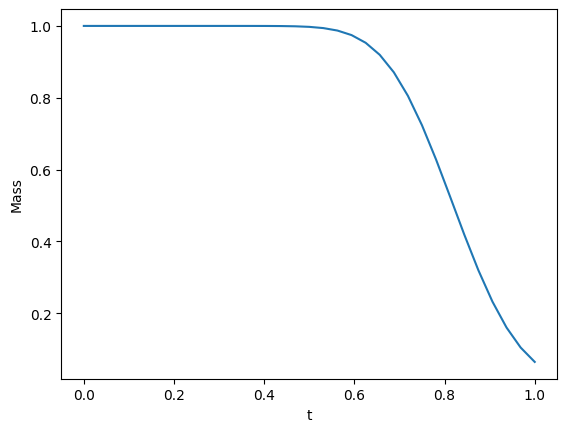

In [5]:
dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']
plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.show()

### Exercise 11 (Circle Wave Problem calculated with Finite volume and discontinuous Galerkin)

We consider the transport equation again as an initial and boundary value problem (IBVP) for a given vector field $q$ with $\text{div}q = 0$.
$$ \begin{align*}
    \begin{array}{rcll}
        \partial_t \rho + \text{div}(\rho q)  & = & 0 & \text{on } \Omega \times [0,T] \\
        \rho(0)                       & = & \rho_0 & \text{on } \Omega \\
        \rho                            & = & \rho_\text{in} & \text{on }
        \Gamma_\text{in} = \{ x \in \partial \Omega \colon q \cdot n < 0 \} \times [0, T]
    \end{array}.
\end{align*}$$
This time we consider

$\underline{\text{Problem B:}}$
\begin{align*}
    \rho_0(x,y) &= \begin{cases}
                       (\cos( 1 / 2 \pi \cdot r) + 1)^2 &,
                       \quad r = \left| \begin{pmatrix}
                                            x \\ y
                       \end{pmatrix} -
                       \begin{pmatrix}
                           2.5 \\ 2.5
                       \end{pmatrix} \right| < 2 \\
                       0 &, \quad \text{else}
    \end{cases} \\
    \rho_\text{in} &= 0 \\
    q(x,y) &= 2\pi (-y,x)^T  \\
\end{align*}
which is given through $\texttt{Problem=Circle\_Wave}$ on $\texttt{Mesh=UnitSquare}$.

#### a) Finite Volume

In [ ]:
mpp.clean_data()
mpp.run(4, config="TUT_transport", kwargs={"degree": 0})

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(n = widgets.IntSlider(min=0, max=200, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("CircleWave2D.{}.pvtu".format(n),vmin = 0.0,vmax = 0.5)

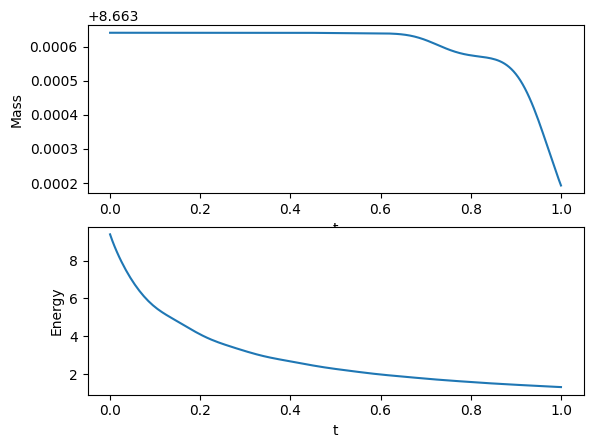

In [12]:
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.subplot(212)
plt.plot([d['t'] for d in dict_array], [d['Energy'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()

#### b) discontinuous Galerkin

In [ ]:
mpp.clean_data()
mpp.run(4, config="TUT_transport", kwargs={"degree": 2})

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

@interact(n = widgets.IntSlider(min=0, max=200, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot()
    p.add_vtu("CircleWave2D.{}.pvtu".format(n))

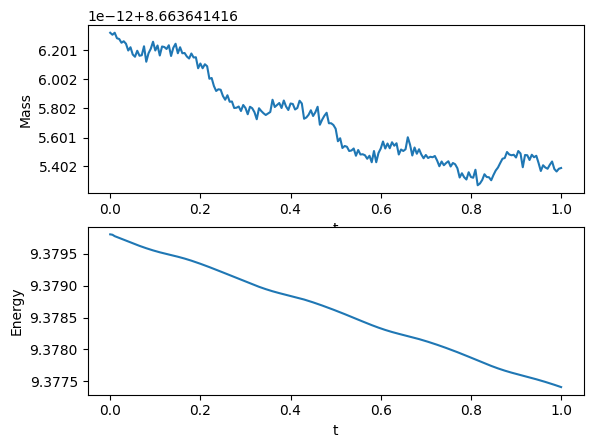

In [14]:
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.subplot(212)
plt.plot([d['t'] for d in dict_array], [d['Energy'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()

### Exercise 12 (Pollution problem)

In this exercise we consider the transport equation a third time: 
$$ \begin{align*}
    \begin{array}{rcll}
        \partial_t \rho + \text{div}(\rho q)  & = & 0 & \text{on } \Omega \times [0,T] \\
        \rho(0)                       & = & \rho_0 & \text{on } \Omega \\
        \rho                            & = & \rho_\text{in} & \text{on }
        \Gamma_\text{in} = \{ x \in \partial \Omega \colon q \cdot n < 0 \} \times [0, T]
    \end{array}.
\end{align*}$$
This time we calculate the flux $q$ with the elliptic problem we called the mixed formulation of Subsurface flows modeled as Laplace problem. 
$$
\begin{align*}
    \begin{array}{cccll}
         \text{div} q(x, y) &= &0, &(x,y) \in \Omega = (0, 1)^2 \\
    - \kappa \nabla u(x,y) &= &q, &(x,y) \in \Omega =  (0, 1)^2 \\
        u(x,y)                  & = & 0 & y = 0 &\text{(Ground-water table)} \\
        \nabla u(x,y) \cdot n &= & -1 & y = 1 &\text{(Inflow)} \\
        \nabla u(x,y) \cdot n & = & 0 & x \in \{0, 1\}&\text{(Neumann-BC)}
    \end{array},
\end{align*}
$$
We therefore use hybrid finite elements. More about the elliptic part can be found in the corresponding notebook.

In [ ]:
mpp.clean_data()
mpp.run(4, config="TUT_pollution", kwargs={"dt":0.00390625})

In [16]:
!ls ../../build/data/vtu

Flux			     PollutionSquare500.212.pvtu
Flux.pvtu		     PollutionSquare500.213
P			     PollutionSquare500.213.pvtu
P.pvtu			     PollutionSquare500.214
PollutionSquare500.0	     PollutionSquare500.214.pvtu
PollutionSquare500.0.pvtu    PollutionSquare500.215
PollutionSquare500.1	     PollutionSquare500.215.pvtu
PollutionSquare500.1.pvtu    PollutionSquare500.216
PollutionSquare500.10	     PollutionSquare500.216.pvtu
PollutionSquare500.10.pvtu   PollutionSquare500.217
PollutionSquare500.100	     PollutionSquare500.217.pvtu
PollutionSquare500.100.pvtu  PollutionSquare500.218
PollutionSquare500.101	     PollutionSquare500.218.pvtu
PollutionSquare500.101.pvtu  PollutionSquare500.219
PollutionSquare500.102	     PollutionSquare500.219.pvtu
PollutionSquare500.102.pvtu  PollutionSquare500.22
PollutionSquare500.103	     PollutionSquare500.22.pvtu
PollutionSquare500.103.pvtu  PollutionSquare500.220
PollutionSquare500.104	     PollutionSquare500.220.pvtu
PollutionSquare500.104.pvtu  PollutionSqua

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=100, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot(dpi=150.0)
    p.add_vtu("PollutionSquare500.{}.pvtu".format(n),vmin = 0.0, vmax = 1.0)

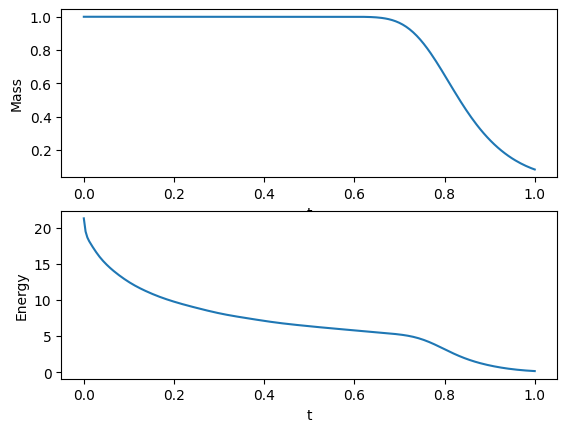

In [18]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.subplot(212)
plt.plot([d['t'] for d in dict_array], [d['Energy'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()

#### a) Finite Volume

In [ ]:
mpp.clean_data()
mpp.run(4, config="TUT_pollution", kwargs={"degree":"0", "dt":0.00390625})

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=100, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot(dpi=150.0)
    p.add_vtu("PollutionSquare500.{}.pvtu".format(n),vmin = 0.0, vmax = 1.0)

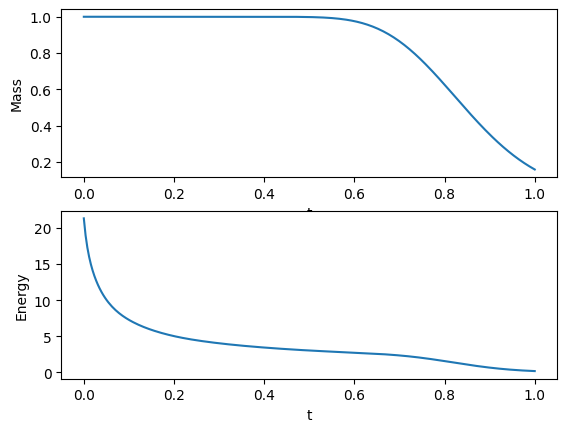

In [20]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.subplot(212)
plt.plot([d['t'] for d in dict_array], [d['Energy'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()

#### b) discontinuous Galerkin

In [ ]:
mpp.clean_data()
kwargs = {"degree": 2, "level": 2, "dt": 0.005}
mpp.run(4, config="TUT_pollution", kwargs = kwargs)

In [ ]:
@interact(n=widgets.IntSlider(min=0, max=200, step=1, value=0))
def plot_i_frame(n):
    p = mpp.vtu_plot(dpi=150.0)
    p.add_vtu("PollutionSquare500.{}.pvtu".format(n),vmin = 0.0, vmax = 1.0)

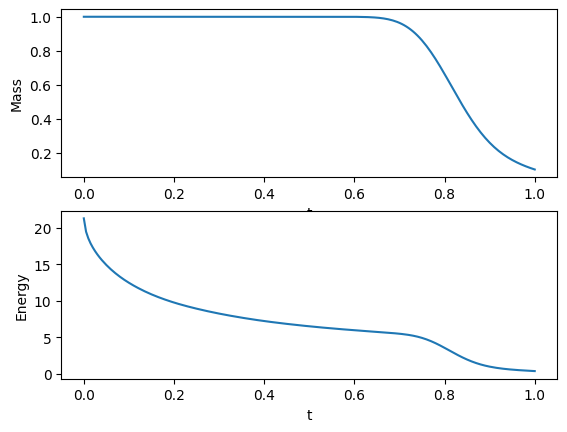

In [24]:
mpp.reset_data()
mpp.parse_json()

plt.subplot(211)

dict_array = mpp.data[-1]['TransportPDESolver']['iteration_0']

plt.plot([d['t'] for d in dict_array], [d['Mass'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Mass')

plt.subplot(212)
plt.plot([d['t'] for d in dict_array], [d['Energy'] for d in dict_array])
plt.xlabel('t')
plt.ylabel('Energy')

plt.show()